In [14]:
from bokeh.layouts import gridplot
import plotly.graph_objects as go
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import altair as alt
import pandas as pd
from plotly.subplots import make_subplots

ZADANIE 1

In [10]:
x = np.linspace(-6 * np.pi, 6 * np.pi, 500)
y1 = np.sin(x)
y2 = np.cos(x)

output_notebook()
p = figure(
    title = "Wykresy funkcji sin i cos",
    x_axis_label = "x",
    y_axis_label = "f(x)",
    width=800,
    height=300
)
p.line(x, y1, legend_label="sin(x)", color="blue")
p.line(x, y2, legend_label="cos(x)", color="orange")
p.legend.location = "top_left"
show(p)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y1, name='sin(x)'))
fig.add_trace(go.Scatter(x=x, y=y2, name='cos(x)'))
fig.update_layout(
    title="Wykresy funkcji sin i cos",
    xaxis_title="x",
    yaxis_title="f(x)",
)
fig.show()



df = pd.DataFrame({"x": x, "sinx": y1, "cosx": y2})
df_melted = df.melt('x', var_name='Funkcja', value_name='wartość')

chart = (
    alt.Chart(df_melted, title ="Wykresy funkcji sin i cos")
    .mark_line()
    .encode(
        x=alt.X("x", title="x"),
        y=alt.Y("wartość", title="f(x)"),
        color=alt.Color('Funkcja', legend=alt.Legend())
    )
    .properties(width=800, height=300)
)
chart

Loading BokehJS ...

alt.Chart(...)

ZADANIE 2

In [15]:
from bokeh.layouts import gridplot
x = np.linspace(-20, 20, 500)

funkcje = {
    "f(x)=x": x,
    "f(x)=x^2": x**2,
    "f(x)=x^3": x**3,
    "f(x)=x^4": x**4
}
output_notebook()
plots = []
for title, y in funkcje.items():
    p = figure(
        title = title,
        x_axis_label = "x",
        y_axis_label = "f(x)",
        width=500,
        height=500
    )
    p.line(x,y)
    plots.append(p)
grid = gridplot([[plots[0], plots[1]], [plots[2], plots[3]]])
show(grid)

fig = make_subplots(
    rows = 2,
    cols = 2,
    subplot_titles = list(funkcje.keys())
)
positions = [(1,1), (1,2), (2,1), (2,2)]
for (name, y), (r, c,) in zip(funkcje.items(), positions):
    fig.add_trace(
        go.Scatter(x=x, y=y, name=name),
        row=r, col=c
    )
fig.update_layout(
    title="Wykresy funkcji",
    height=500,
    width=800,
)
fig.show()

df = pd.DataFrame({
    "x": x,
    "x^1": x**1,
    "x^2": x**2,
    "x^3": x**3,
    "x^4": x**4
})

df_melt = df.melt('x', var_name='Funkcja', value_name='Wartość')

chart = (
    alt.Chart(df_melt)
    .mark_line()
    .encode(
        x=alt.X('x', title='x'),
        y=alt.Y('Wartość', title='f(x)'),
        color=alt.Color('Funkcja', legend=alt.Legend(title="Funkcja"))
    )
    .properties(width=150, height=150)
    .facet(column='Funkcja')
    .resolve_scale(
        x='independent',
        y='independent'
    )

)

chart



Loading BokehJS ...

alt.FacetChart(...)

ZADANIE 3

In [5]:
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.plotting import figure, show
a, b = 0, 0
x = np.linspace(-5, 5, 500)
y = a*x +b
source = ColumnDataSource(data=dict(x=x, y=y))
plot = figure(y_range=(-5, 5), width=800, height=300)
plot.line('x', 'y', source = source)
a = Slider(start=0, end=1, value=0.5, step=0.1, title='a')
b = Slider(start=0, end=1, value=0, step=0.1, title='b')

callback = CustomJS(args=dict(source = source, a=a, b=b),
                    code = """
                        const A = a.value
                        const B = b.value
                        const x = source.data.x
                        const y = Array.from(x, xi => A * xi +B)
                        source.data = { x, y }
                    """
                    )
a.js_on_change('value', callback)
b.js_on_change('value', callback)

show(row(plot, column(a, b)))


ZADANIE 4

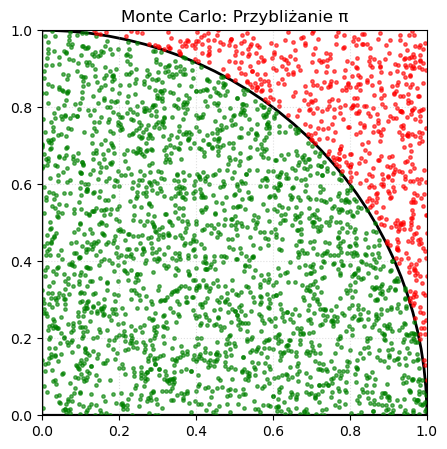

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def zad3(N_total=3000, points_per_frame=50, seed=0):
    np.random.seed(seed)
    x_all = np.random.rand(N_total)
    y_all = np.random.rand(N_total)
    inside_all = (x_all**2 + y_all**2) <= 1.0

    frames = int(np.ceil(N_total / points_per_frame))

    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_aspect('equal')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.grid(True, linestyle=':', alpha=0.4)
    ax.set_title("Monte Carlo: Przybliżanie π")

    from matplotlib.patches import Wedge
    ax.add_patch(Wedge((0,0), 1, 0, 90, facecolor='none', edgecolor='black', linewidth=2))

    scat_inside = ax.scatter([], [], s=6, color='green', alpha=0.6)
    scat_outside = ax.scatter([], [], s=6, color='red', alpha=0.6)

    xs_inside, ys_inside = [], []
    xs_out, ys_out = [], []

    def init():
        scat_inside.set_offsets(np.empty((0,2)))
        scat_outside.set_offsets(np.empty((0,2)))
        return scat_inside, scat_outside

    def update(frame):
        start = frame * points_per_frame
        end = min((frame+1) * points_per_frame, N_total)
        xs = x_all[start:end]
        ys = y_all[start:end]
        ins = inside_all[start:end]

        if np.any(ins):
            xs_inside.extend(xs[ins])
            ys_inside.extend(ys[ins])
        if np.any(~ins):
            xs_out.extend(xs[~ins])
            ys_out.extend(ys[~ins])
        scat_inside.set_offsets(np.column_stack((xs_inside, ys_inside)))
        scat_outside.set_offsets(np.column_stack((xs_out, ys_out)))

        return scat_inside, scat_outside

    anim = animation.FuncAnimation(fig, update, frames=frames, init_func=init,
                                   blit=False, interval=50, repeat=True)
    return HTML(anim.to_jshtml())

zad3()